# HR Employee Attrition – Modelo Probabilístico (Naive Bayes)

## Introducción
La rotación de personal (*attrition*) continúa siendo un desafío clave para las organizaciones, ya que genera costos de reemplazo, pérdida de conocimiento y menor productividad.  
Este proyecto busca **evaluar un enfoque probabilístico de clasificación** para estimar la probabilidad de renuncia, utilizando el algoritmo **Naive Bayes**.  

Se enmarca como continuación del proyecto anterior **“HR_Employee_Attrition_Models”**, en el cual se desarrollaron modelos basados en árboles de decisión, bosques aleatorios y regresión logística. Aquí se busca **comparar el rendimiento y las limitaciones de Naive Bayes** frente a esos métodos, bajo las mismas condiciones de datos y preparación.

**Dataset:** `data/HR-Employee-Attrition.csv`  
(IBM HR Analytics – datos sintéticos para uso educativo, ~1.470 filas y ~35 columnas con variables demográficas, de satisfacción, desempeño y antigüedad).

## Preguntas guía
- ¿Cómo se comporta un modelo probabilístico como **Naive Bayes** frente a los modelos anteriores (Decision Tree, Random Forest y Logistic Regression)?  
- ¿Qué supuestos de independencia entre variables afectan su rendimiento?  
- ¿Puede un modelo simple, basado en probabilidad condicional, ofrecer resultados competitivos?

## Objetivos
**Analíticos (EDA):**
- Revisar brevemente la distribución de variables y su relación con la clase `Attrition`.
- Evaluar posibles dependencias entre predictores que influyan en el supuesto de independencia.

**Modelado (ML):**
- Entrenar y evaluar variantes del modelo **Naive Bayes** (`GaussianNB`, `MultinomialNB`, `BernoulliNB`).
- Comparar su desempeño con los modelos del proyecto base.
- Evaluar con **ROC-AUC**, **Recall**, **F1-score** y **Matriz de confusión**.

**Interpretabilidad:**
- Analizar cómo el modelo estima las probabilidades de renuncia según las características de los empleados.

## Alcance y supuestos
- Datos sintéticos, orientados a práctica educativa y portfolio profesional.  
- Se mantienen los mismos procesos de limpieza y transformación del proyecto previo para garantizar comparabilidad.  
- No se incluyen datos reales ni información sensible.

## Reproducibilidad
- Requisitos en `requirements.txt`.  
- Dataset público incluido en `data/HR-Employee-Attrition.csv`.  
- Semillas aleatorias fijadas para garantizar replicabilidad.

---

**Estructura del notebook:**  

0) Configuración inicial  
1) Carga e inspección de datos  
2) Preparación y transformación de variables  
3) EDA (versión abreviada, centrada en independencia y distribución por clase)  
4) Modelado con Naive Bayes  
5) Evaluación y conclusiones

# 0. Configuración inicial

En esta sección se importan las librerías necesarias y se definen configuraciones visuales globales  
que se aplicarán a lo largo del notebook.

In [1]:
# --- Importaciones principales ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Preprocesamiento y división ---
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# --- Modelo probabilístico ---
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# --- Evaluación ---
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)

In [2]:
# --- Configuración visual ---

# Estilo general de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')

# Mostrar todas las columnas al inspeccionar DataFrames
pd.set_option('display.max_columns', None)

# 1. Carga e inspección inicial de los datos
En esta sección se importa el dataset y se realiza una primera exploración general.  
El objetivo es verificar la estructura, tipos de datos, valores nulos o duplicados,  
y obtener una visión preliminar del contenido antes del análisis detallado.

In [3]:
# --- Carga de datos ---
df = pd.read_csv("data/HR_Employee_Attrition.csv")

In [4]:
# --- Vista general y estructura ---
print("Dimensiones:", df.shape)
display(df.head())
print("\nInformación general del DataFrame:\n")
df.info()

Dimensiones: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2



Información general del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null  

In [5]:
# --- Calidad de datos ---

# Valores nulos por columna
nulos = df.isnull().sum().sort_values(ascending=False)
print("Valores nulos por columna:\n")
print(nulos.to_string())

# Filas duplicadas
duplicados = df.duplicated().sum()
print(f"\nFilas duplicadas: {duplicados}")

Valores nulos por columna:

Age                         0
StandardHours               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
MonthlyIncome               0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
MonthlyRate                 0
MaritalStatus               0
Attrition                   0
EmployeeCount               0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
JobSatisfaction             0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel    

In [6]:
# --- Estadísticas generales ---

# Resumen estadístico de las variables numéricas
df.describe().round(2)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.0,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.0,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.0,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.0,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.0,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.0,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.0,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.0,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.0,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.0,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.0,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.0,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.0,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [7]:
# --- Variable objetivo y cardinalidad ---

# Distribución de la variable objetivo
print("Distribución de 'Attrition':\n")
print(df['Attrition'].value_counts())
print("\nProporción (%):")
print(round(df['Attrition'].value_counts(normalize=True) * 100, 2))

# Cardinalidad de las variables
print("\nCantidad de valores únicos por columna:\n")
print(df.nunique().sort_values(ascending=False))

Distribución de 'Attrition':

Attrition
No     1233
Yes     237
Name: count, dtype: int64

Proporción (%):
Attrition
No     83.88
Yes    16.12
Name: proportion, dtype: float64

Cantidad de valores únicos por columna:

EmployeeNumber              1470
MonthlyRate                 1427
MonthlyIncome               1349
DailyRate                    886
HourlyRate                    71
Age                           43
TotalWorkingYears             40
YearsAtCompany                37
DistanceFromHome              29
YearsInCurrentRole            19
YearsWithCurrManager          18
YearsSinceLastPromotion       16
PercentSalaryHike             15
NumCompaniesWorked            10
JobRole                        9
TrainingTimesLastYear          7
EducationField                 6
JobLevel                       5
Education                      5
StockOptionLevel               4
JobInvolvement                 4
JobSatisfaction                4
WorkLifeBalance                4
EnvironmentSatisfaction

## Eliminación de variables sin valor explicativo

Antes del análisis exploratorio y posterior modelado, se eliminan las variables que no aportan información relevante para predecir la variable objetivo `Attrition`.  
A partir del análisis de la cantidad de valores únicos por columna, se observa que algunas variables son constantes o identificadoras, por lo que carecen de valor predictivo.

Las variables eliminadas son:

- **EmployeeNumber:** identificador único de cada empleado (sin relación con la rotación).  
- **EmployeeCount:** solo un valor único en toda la columna.  
- **StandardHours:** constante para todos los registros.  
- **Over18:** también constante, dado que todos los empleados son mayores de edad.  

Estas variables no tienen potencial explicativo y se eliminan del dataset antes del modelado.

In [8]:
# --- Eliminación de variables sin valor explicativo ---

cols_to_drop = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18']
df = df.drop(columns=cols_to_drop)

# Verificación rápida tras la eliminación
print("Dimensiones después de eliminar columnas:", df.shape)

Dimensiones después de eliminar columnas: (1470, 31)


# 2. Preparación y transformación de variables
En esta sección se realiza el preprocesamiento inicial del dataset.  
Se revisa la variable objetivo **Attrition** y se la convierte a formato numérico (1 = Yes, 0 = No),  
dejando el conjunto de datos listo para el análisis exploratorio y el modelado posterior.

## Transformación de variables dicotómicas

En esta etapa se convierten las variables categóricas binarias (con valores `Yes/No` o `Male/Female`) 
a formato numérico (`1/0`), requisito necesario para los algoritmos de *Machine Learning*.  
La variable objetivo **Attrition** (renuncia del empleado) y las variables **OverTime** y **Gender**
se transforman en valores binarios equivalentes.

In [9]:
# --- Verificación de la variable objetivo ---
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [11]:
# --- Transformación de variables dicotómicas ---
# Se convierten las variables categóricas binarias (Yes/No) a formato numérico (1/0)
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [12]:
# --- Verificación del cambio ---

print("Attrition:")
print(df['Attrition'].value_counts(), "\n")

print("OverTime:")
print(df['OverTime'].value_counts(), "\n")

print("Gender:")
print(df['Gender'].value_counts())

Attrition:
Attrition
0    1233
1     237
Name: count, dtype: int64 

OverTime:
OverTime
0    1054
1     416
Name: count, dtype: int64 

Gender:
Gender
1    882
0    588
Name: count, dtype: int64


## Análisis del balance de clases

Antes del modelado, es importante observar la proporción de empleados que renunciaron (`Attrition = 1`)  
respecto de los que permanecen en la empresa (`Attrition = 0`). Esto permite anticipar posibles sesgos del modelo.

C:\Users\elias\AppData\Local\Temp\ipykernel_28784\2060941741.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='Set2')


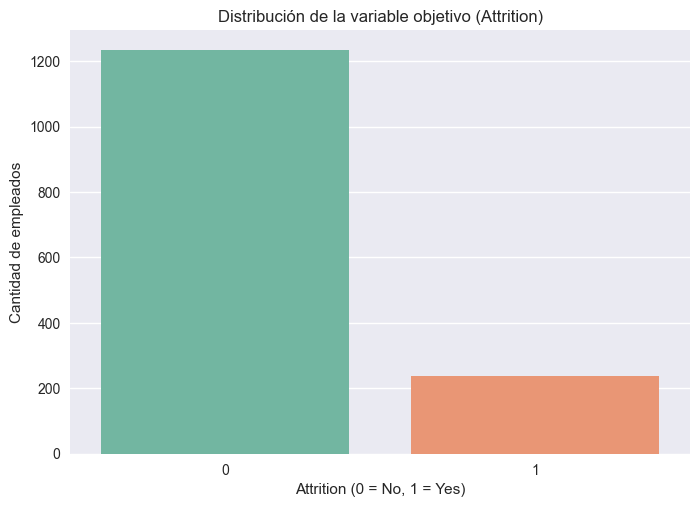


Porcentaje de cada clase:
Attrition
0    83.88
1    16.12
Name: proportion, dtype: float64


In [13]:
# --- Análisis del balance de clases ---
sns.countplot(x='Attrition', data=df, palette='Set2')
plt.title('Distribución de la variable objetivo (Attrition)')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.ylabel('Cantidad de empleados')
plt.show()

# Porcentaje de cada clase
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print(f"\nPorcentaje de cada clase:\n{attrition_rate.round(2)}")

## Identificación de variables numéricas y categóricas

Antes de avanzar con el análisis exploratorio, se identifican las variables numéricas y categóricas del dataset.  
Esto permitirá decidir qué tipo de visualizaciones y transformaciones aplicar en cada caso.

In [14]:
# --- Identificación de variables numéricas y categóricas ---

# Seleccionamos los nombres de las columnas según su tipo
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Variables numéricas:", len(num_cols))
print(num_cols.tolist())
print("\nVariables categóricas:", len(cat_cols))
print(cat_cols.tolist())

Variables numéricas: 26
['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Variables categóricas: 5
['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']


## Codificación de variables categóricas (One-Hot Encoding)

Algunas variables categóricas contienen más de dos categorías (por ejemplo, 
`BusinessTravel`, `Department`, `JobRole`, `MaritalStatus` o `EducationField`).  
Para que puedan ser utilizadas por los algoritmos de *Machine Learning*, se transforman 
mediante **One-Hot Encoding**, que crea una nueva columna por cada categoría posible, 
con valores binarios (`0` o `1`).  

Este paso convierte todas las variables categóricas en formato numérico, 
manteniendo la información original sin introducir un orden artificial entre las categorías.

In [15]:
# --- Selección de variables categóricas a codificar ---
X_cat = df[['BusinessTravel', 'EducationField', 'Department', 'JobRole', 'MaritalStatus']]

In [16]:
# --- Inicialización y transformación ---
ohe = OneHotEncoder()
X_cat_encoded = ohe.fit_transform(X_cat).toarray()

In [17]:
# --- Conversión a DataFrame con nombres de columnas legibles ---
X_cat_encoded = pd.DataFrame(
    X_cat_encoded, 
    columns=ohe.get_feature_names_out(X_cat.columns)
)

In [18]:
# Se conserva el mismo índice del DataFrame original
# para mantener alineadas las filas al concatenar.
X_cat_encoded.index = df.index

In [19]:
# --- Unión con el DataFrame original y eliminación de las columnas originales ---
df_encoded = pd.concat([df.drop(X_cat.columns, axis=1), X_cat_encoded], axis=1)

In [ ]:
# ohe.get_feature_names_out(X_cat.columns)  # Útil para inspeccionar las columnas creadas

array(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'], dtype=object)

In [ ]:
# --- Verificación final ---
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int64  
 2   DailyRate                          1470 non-null   int64  
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   int64  
 5   EnvironmentSatisfaction            1470 non-null   int64  
 6   Gender                             1470 non-null   int64  
 7   HourlyRate                         1470 non-null   int64  
 8   JobInvolvement                     1470 non-null   int64  
 9   JobLevel                           1470 non-null   int64  
 10  JobSatisfaction                    1470 non-null   int64  
 11  MonthlyIncome                      1470 non-null   int64

# 3. Análisis exploratorio de los datos (EDA)

En esta sección se analizan distribuciones, relaciones y patrones entre variables 
(numéricas y categóricas), con especial atención a su vínculo con la variable objetivo 
**Attrition**.

## Correlación de las variables numéricas con Attrition

La correlación de las variables numéricas con la variable objetivo es baja en general,
lo que sugiere que la rotación no depende de un único factor cuantitativo, sino de la
combinación de múltiples variables (numéricas y categóricas). Esto refuerza la necesidad
de considerar interacciones y patrones distribuidos al momento del modelado.

Attrition                   1.000000
OverTime                    0.246118
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
Gender                      0.029453
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: Attrition, dtype: float64


C:\Users\elias\AppData\Local\Temp\ipykernel_28784\826133724.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values, y=corr_target.index, palette='coolwarm')


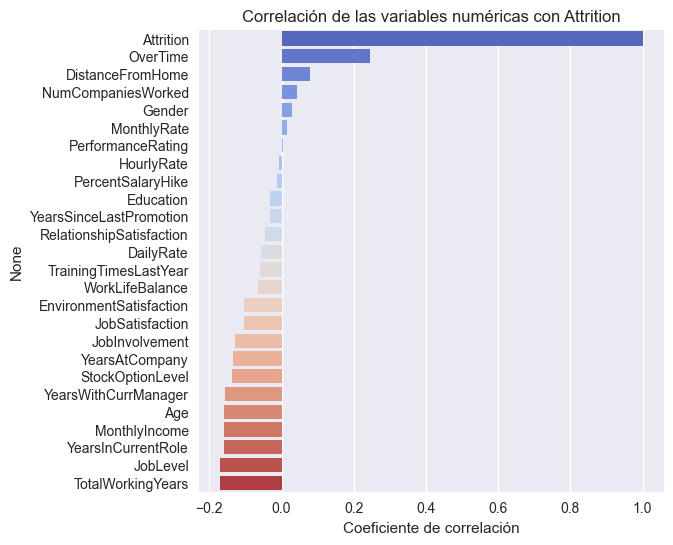

In [23]:
# --- Correlación de variables numéricas con Attrition ---
corr_target = df.corr(numeric_only=True)['Attrition'].sort_values(ascending=False)
print(corr_target)

# --- Visualización de correlaciones ---
plt.figure(figsize=(6,6))
sns.barplot(x=corr_target.values, y=corr_target.index, palette='coolwarm')
plt.title('Correlación de las variables numéricas con Attrition')
plt.xlabel('Coeficiente de correlación')
plt.show()

Para mejorar la legibilidad, se seleccionaron las variables numéricas con mayor relación
con la variable objetivo en lugar de mostrar la matriz completa de correlaciones. Estas
variables representan distintos aspectos del perfil laboral (edad, ingreso, antigüedad,
promociones, distancia al trabajo) que podrían influir en la rotación del personal.

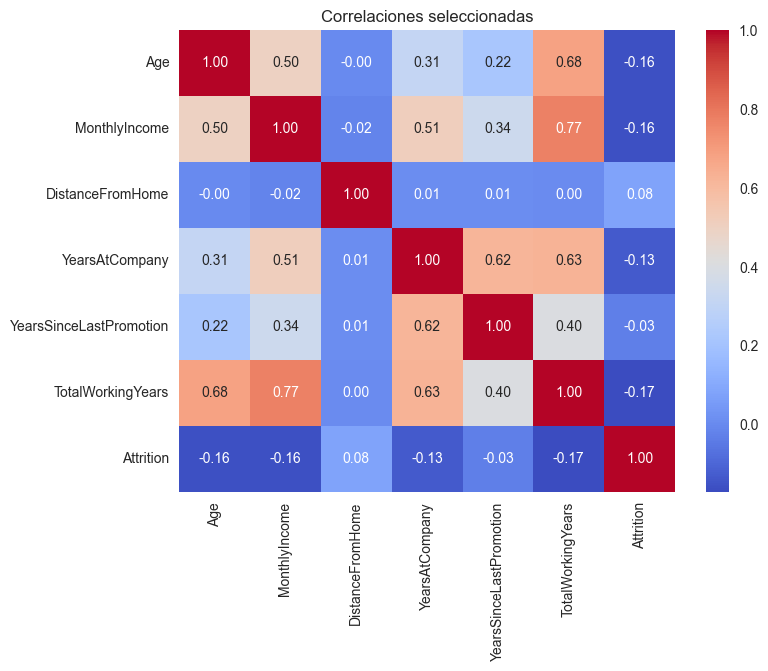

In [25]:
# --- Matriz de correlación de variables numéricas seleccionadas ---

num_focus = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany',
             'YearsSinceLastPromotion', 'TotalWorkingYears', 'Attrition']

plt.figure(figsize=(8,6))
sns.heatmap(df[num_focus].corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlaciones seleccionadas')
plt.show()


## Análisis de variables categóricas
En esta sección se exploran las principales variables categóricas en relación con la variable objetivo **Attrition**, 
para detectar patrones de comportamiento o posibles factores asociados a la rotación del personal.

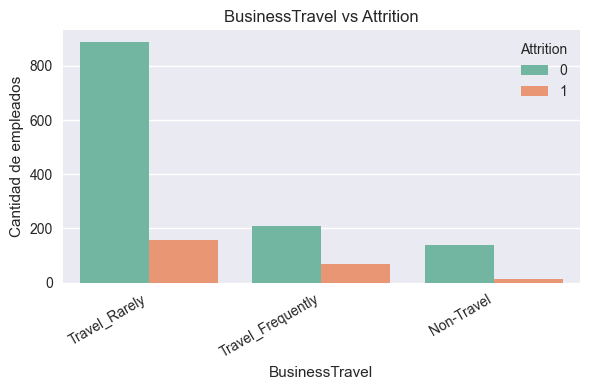

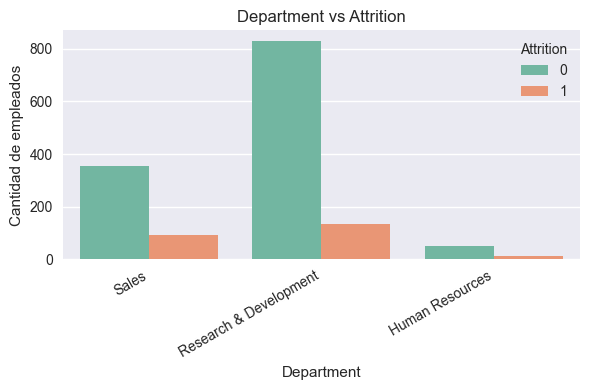

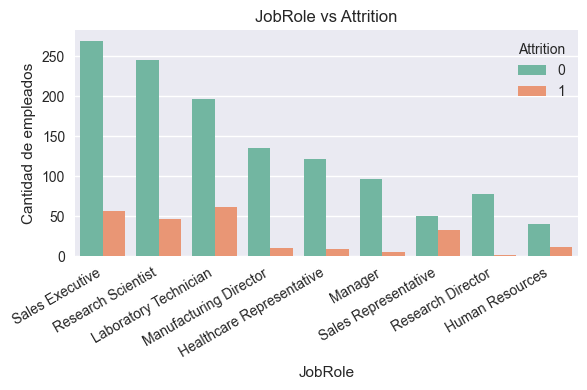

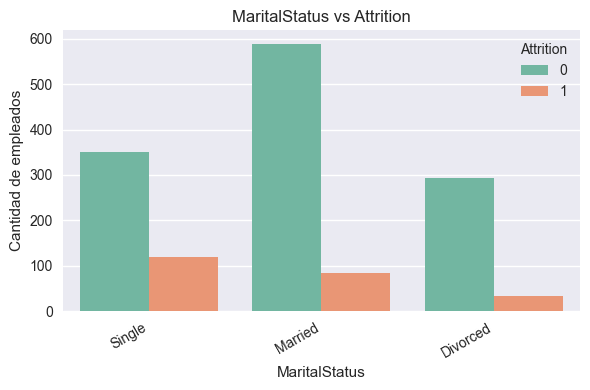

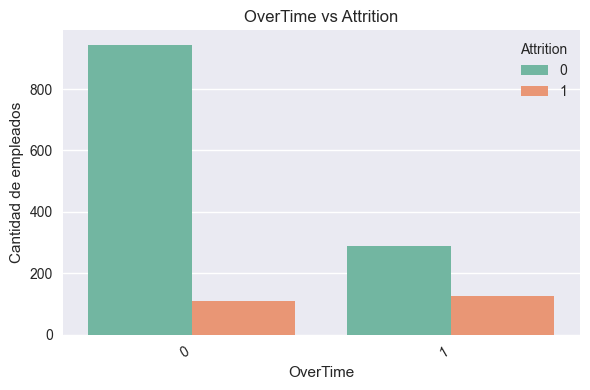

In [25]:
# --- Variables categóricas clave ---
cat_focus = ['BusinessTravel', 'Department', 'JobRole', 'MaritalStatus', 'OverTime']

for col in cat_focus:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Attrition', data=df, palette='Set2')
    plt.title(f'{col} vs Attrition')
    plt.xlabel(col)
    plt.ylabel('Cantidad de empleados')
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()

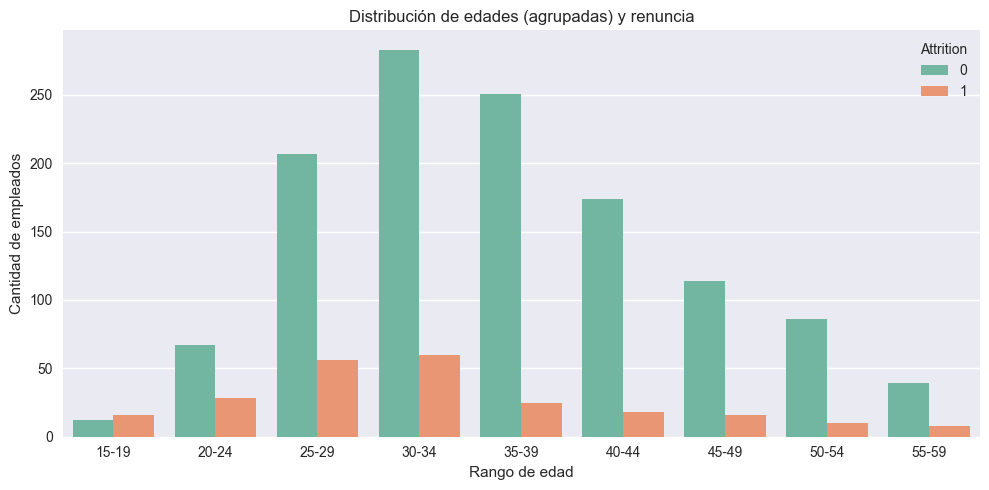

In [ ]:
# --- Edad agrupada en rangos de 5 años ---

bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
labels = ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10,5))
sns.countplot(x='AgeGroup', hue='Attrition', data=df, palette='Set2')
plt.title('Distribución de edades (agrupadas) y renuncia')
plt.xlabel('Rango de edad')
plt.ylabel('Cantidad de empleados')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

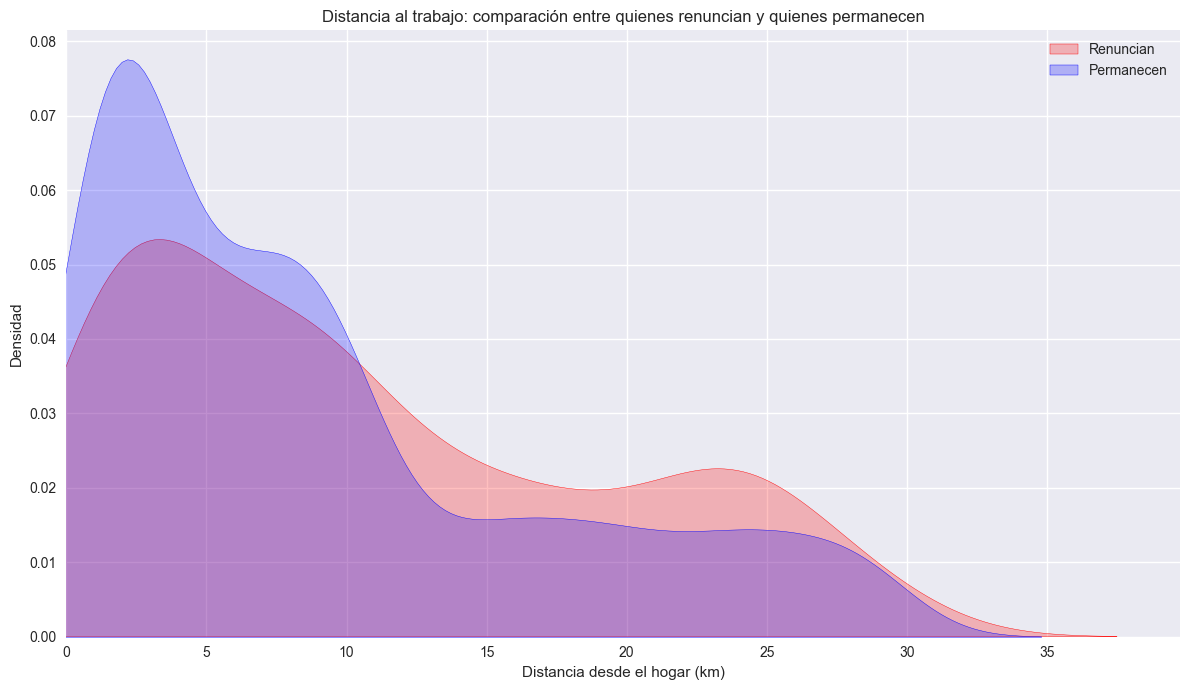

In [34]:
# --- Distancia al trabajo: comparación entre quienes renuncian y quienes permanecen ---

plt.figure(figsize=(12,7))
sns.kdeplot(df[df['Attrition'] == 1]['DistanceFromHome'], label="Renuncian", color='r', fill=True, common_norm=False)
sns.kdeplot(df[df['Attrition'] == 0]['DistanceFromHome'], label="Permanecen", color='b', fill=True, common_norm=False)
plt.title('Distancia al trabajo: comparación entre quienes renuncian y quienes permanecen')
plt.xlabel('Distancia desde el hogar (km)')
plt.ylabel('Densidad')
plt.legend()
plt.xlim(0)
plt.tight_layout()
plt.show()

> Se utiliza `common_norm=False` para normalizar cada curva de forma independiente y comparar la forma de las distribuciones sin efectos derivados del desbalance de clases.

### Interpretación general de las variables

Se observan patrones claros en la relación entre las variables analizadas y la variable objetivo
(**Attrition**), que representa la renuncia del empleado a la empresa:

- Los empleados que realizan **horas extra (`OverTime = Yes`)** presentan una tasa de abandono
significativamente mayor.
- En cuanto a los **roles y departamentos**, se identifica una mayor proporción de salidas en
puestos operativos como *Sales Executive*, *Laboratory Technician* y *Research Scientist*,
lo que sugiere un nivel de rotación superior frente a cargos gerenciales.
- El **estado civil** también muestra diferencias: los empleados **solteros** tienden a dejar la empresa
con mayor frecuencia que los casados o divorciados.
- Respecto a los **viajes laborales (`BusinessTravel`)**, quienes viajan más asiduamente muestran una
tendencia levemente superior a abandonar la organización.
- En las variables numéricas, los empleados **más jóvenes** exhiben mayores tasas de salida, lo cual
podría asociarse a una menor estabilidad laboral o exploración de nuevas oportunidades profesionales.
- La **distancia desde el hogar (`DistanceFromHome`)** presenta una diferencia moderada: quienes viven
más lejos muestran una propensión algo mayor a abandonar, aunque el efecto no es determinante.

Estos resultados indican que la salida de empleados no depende de un único factor cuantitativo, sino de
la **combinación de condiciones laborales y personales**, que en conjunto pueden aumentar la probabilidad
de abandono.

## Síntesis del análisis exploratorio

El análisis exploratorio permitió identificar patrones tanto en variables numéricas como categóricas.  
Las correlaciones mostraron relaciones débiles entre las variables cuantitativas y la renuncia, lo que sugiere que el abandono de la empresa no depende de un único factor medible, sino de la combinación de aspectos laborales y personales.  
En las variables categóricas, destacan las tasas más altas de renuncia entre empleados con horas extra frecuentes,
determinados puestos operativos y personas solteras.  
Estos hallazgos orientan las siguientes etapas de modelado predictivo, donde se evaluará qué variables contribuyen con mayor peso a predecir la probabilidad de renuncia.

# 4. Modelado predictivo

En esta etapa se construyen y evalúan **diferentes variantes del modelo de clasificación Naive Bayes**, con el
objetivo de predecir la probabilidad de renuncia de un empleado a partir de las variables disponibles.

Este enfoque probabilístico permite modelar la relación entre las características del empleado y la variable
objetivo **Attrition**, asumiendo independencia condicional entre las variables predictoras. Si bien esta
suposición rara vez se cumple de manera estricta en contextos reales, el algoritmo suele ofrecer resultados
competitivos y una interpretación clara de las probabilidades asociadas a cada clase.

Antes del entrenamiento, se definen las variables predictoras (**X**) y la variable objetivo (**y**), y se
realiza la **división del conjunto de datos** en entrenamiento y prueba, manteniendo la proporción de clases
observada en el dataset original (*stratify*). Esto permite evaluar el desempeño del modelo de manera
consistente y mitigar posibles sesgos derivados del desbalance de clases.

In [35]:
# --- Definición de variables predictoras y variable objetivo ---
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

In [36]:
# --- División en conjunto de entrenamiento y prueba ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [37]:
print(f"Tamaño de entrenamiento: {len(X_train)}")
print(f"Tamaño de prueba: {len(X_test)}")

Tamaño de entrenamiento: 1029
Tamaño de prueba: 441


## 4.1 Naive Bayes Gaussiano (GaussianNB)

Esta variante asume que las características siguen una **distribución normal (gaussiana)** dentro de cada clase.
Es especialmente adecuada cuando existen variables **numéricas continuas**, como edad, ingresos, tiempo en la
empresa o distancia al trabajo, presentes en este dataset. 

Debido a esta compatibilidad con variables continuas, GaussianNB suele ofrecer un rendimiento estable en
contextos mixtos donde conviven atributos numéricos y categóricos codificados mediante One-Hot Encoding.

In [41]:
# --- Modelo base (Naive Bayes) ---
# En el proyecto anterior se compararon modelos con y sin class_weight para manejar el desbalance.
# En Naive Bayes este parámetro no está disponible, por lo que se entrena únicamente el modelo base.

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)


GaussianNB()

In [42]:
# --- Predicciones ---
# Se generan las predicciones sobre el conjunto de prueba (X_test) utilizando el modelo base.
y_pred_nb = model_nb.predict(X_test)

=== Modelo Naive Bayes (base) ===
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       370
           1       0.32      0.63      0.43        71

    accuracy                           0.73       441
   macro avg       0.62      0.69      0.62       441
weighted avg       0.82      0.73      0.76       441



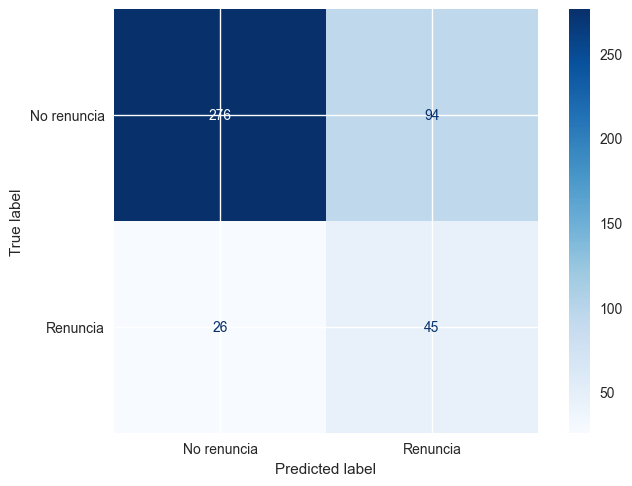

In [45]:
# --- Evaluación del modelo Naive Bayes ---

print("=== Modelo Naive Bayes (base) ===")
print(classification_report(y_test, y_pred_nb))

cm_nb = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(cm_nb, display_labels=['No renuncia', 'Renuncia']).plot(cmap='Blues')

In [46]:
# --- Probabilidades de predicción ---
y_proba_nb = model_nb.predict_proba(X_test)[:, 1]

In [47]:
# --- ROC-AUC ---
auc_nb = roc_auc_score(y_test, y_proba_nb)
print(f"ROC-AUC (Naive Bayes): {auc_nb:.3f}")

ROC-AUC (Naive Bayes): 0.744


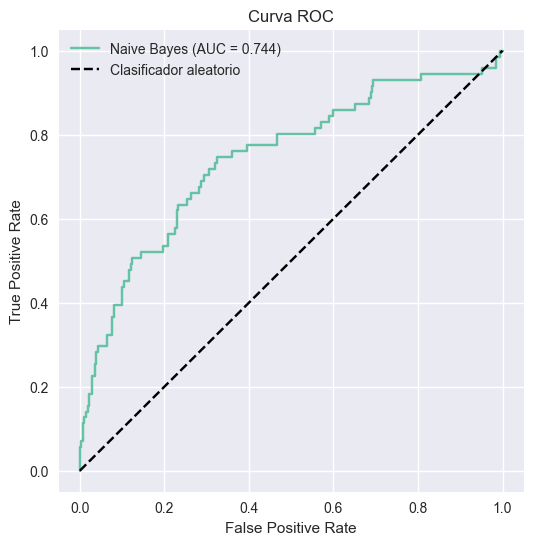

In [48]:
# --- Curva ROC ---
fpr, tpr, thresholds = roc_curve(y_test, y_proba_nb)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"Naive Bayes (AUC = {auc_nb:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

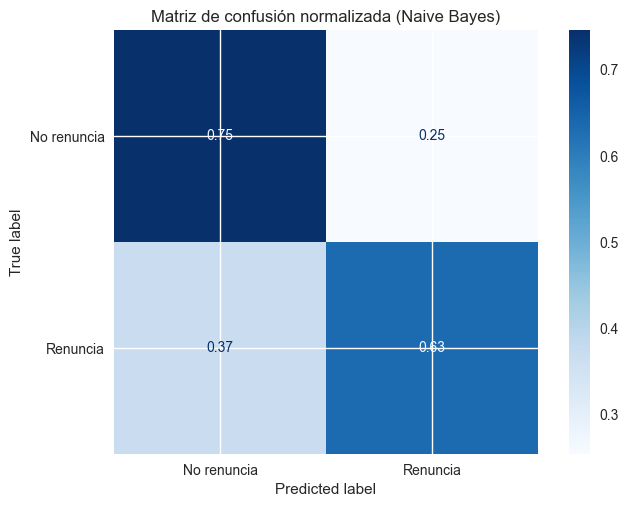

In [49]:
# --- Matriz de confusión normalizada ---
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_nb, normalize='true',
    display_labels=['No renuncia', 'Renuncia'],
    cmap='Blues'
)
plt.title('Matriz de confusión normalizada (Naive Bayes)')
plt.show()


### 📊 Interpretación del modelo Naive Bayes Gaussiano (GaussianNB)

El modelo **Gaussian Naive Bayes** presenta un rendimiento global aceptable, con un **ROC–AUC de aproximadamente
0.74**, lo que indica una capacidad moderada para distinguir entre empleados que renuncian y quienes permanecen.

Al analizar el desempeño por clase, se observa un comportamiento desigual:

- Para la clase **0 (No renuncia)**, el modelo alcanza valores elevados de *precision* y *recall*, identificando
  correctamente a la mayoría de los empleados que permanecen en la empresa.
- En cambio, para la clase **1 (Renuncia)**, las métricas se reducen, reflejando la **dificultad inherente para
  detectar casos de abandono** en un contexto con **desbalance de clases** (menos del 20 % de renuncias).

Este modelo tiende a clasificar más casos como permanencia, generando **falsos negativos**: empleados que
renuncian pero son predichos como retenidos. En escenarios reales, este error puede tener impacto operativo y
de planificación.

Debido a la **suposición de independencia condicional** entre variables, es esperable que algunas correlaciones
presentes en los datos no sean capturadas plenamente. No obstante, el algoritmo ofrece **entrenamiento rápido**,
buena interpretabilidad probabilística y un rendimiento competitivo para una primera aproximación.

## 4.2 Naive Bayes Bernoulli (BernoulliNB)

Esta variante está diseñada para características **binarias (0/1)**, donde se modela la presencia o ausencia de
un atributo. Resulta especialmente adecuada cuando se utilizan variables categóricas codificadas mediante
*One-Hot Encoding*, como ocurre en este dataset. 

BernoulliNB tiende a desempeñarse mejor cuando las distribuciones de valores se concentran en dos estados
posibles, lo que permite capturar patrones simples asociados a la renuncia. No obstante, su rendimiento puede
verse limitado al no aprovechar la variabilidad de características numéricas continuas, como edad o ingresos.

## 4.3 Naive Bayes Multinomial (MultinomialNB)

Esta variante se utiliza típicamente en problemas donde las características representan **conteos discretos**,
como la frecuencia de palabras en análisis de texto (*bag-of-words*). En este dataset, no existe información
estructurada como conteos, por lo que su aplicación se incluye con fines comparativos.

Si bien MultinomialNB puede operar sobre valores no binarios, su desempeño puede verse afectado cuando las
características no provienen de distribuciones basadas en frecuencias, lo que lo convierte en un enfoque menos
natural para este tipo de datos.

# 5. Conclusiones generales --> EDITARRRRRRRRRRRRR!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

El análisis comparativo entre los tres modelos de clasificación —**Árbol de Decisión**, **Bosque Aleatorio** y **Regresión Logística**— permitió evaluar distintas estrategias para predecir la renuncia de empleados (*Attrition*).

- El **Árbol de Decisión** ofreció una interpretación clara pero limitada capacidad predictiva sobre la clase minoritaria.  
- El **Bosque Aleatorio** mejoró la precisión y estabilidad general, aunque mantuvo baja sensibilidad frente a las renuncias.  
- La **Regresión Logística**, especialmente en su versión balanceada, logró un mejor equilibrio entre precisión e interpretabilidad, incrementando el *recall* de la clase minoritaria.

En conjunto, los resultados evidencian que el **desbalance de clases** sigue siendo un desafío central, y que la combinación de **modelos explicativos y técnicas de balanceo** constituye una estrategia efectiva para comprender y anticipar la rotación laboral.

Este proyecto demuestra la aplicación del **flujo completo de Machine Learning supervisado**, desde la exploración de datos hasta la evaluación e interpretación de modelos, con criterios reproducibles y orientados a la toma de decisiones.